In [11]:
from dotenv import load_dotenv
import os

load_dotenv()

True

In [12]:
wand_api_key = os.environ.get("WANDB_API_KEY")
wand_run = os.environ.get("WANDB_RUN")

In [13]:
import wandb
import matplotlib.pyplot as plt

In [14]:
wandb_api = wandb.Api(
    api_key=wand_api_key
)

In [15]:
run = wandb_api.run(wand_run)

In [17]:
history = run.history()

In [18]:
history

,train/epoch,train/grad_norm,train/global_step,train/learning_rate,_step,_runtime,_timestamp,train/loss
0,0.001008,3.122767,2,8.000000e-06,1,51.503413,1.740675e+09,4.5348
1,0.001513,3.339565,3,1.200000e-05,2,57.543614,1.740675e+09,5.1899
2,0.002017,3.074171,4,1.600000e-05,3,63.571230,1.740675e+09,4.6163
3,0.002521,3.632037,5,2.000000e-05,4,69.171675,1.740675e+09,5.2804
4,0.003025,2.794167,6,1.998662e-05,5,75.853845,1.740675e+09,4.3027
...,...,...,...,...,...,...,...,...
495,0.751796,4.528515,1491,1.204013e-07,1490,9288.881267,1.740684e+09,0.9099
496,0.752805,5.222225,1493,9.364548e-08,1492,9299.985573,1.740684e+09,1.1026
497,0.755326,3.808366,1498,2.675585e-08,1497,9331.773902,1.740684e+09,0.8789
498,0.756334,5.648837,1500,0.000000e+00,1499,9344.276893,1.740684e+09,0.9697


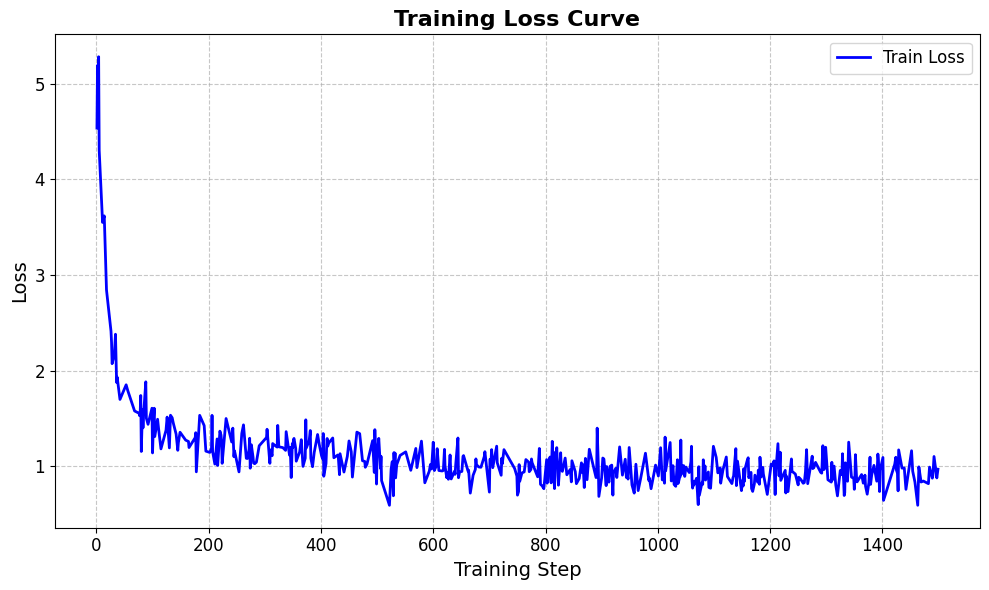

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(history['_step'], history['train/loss'], label='Train Loss', color='blue', linewidth=2)
plt.xlabel('Training Step', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training Loss Curve', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('training_loss_curve.png', dpi=300)
plt.show()

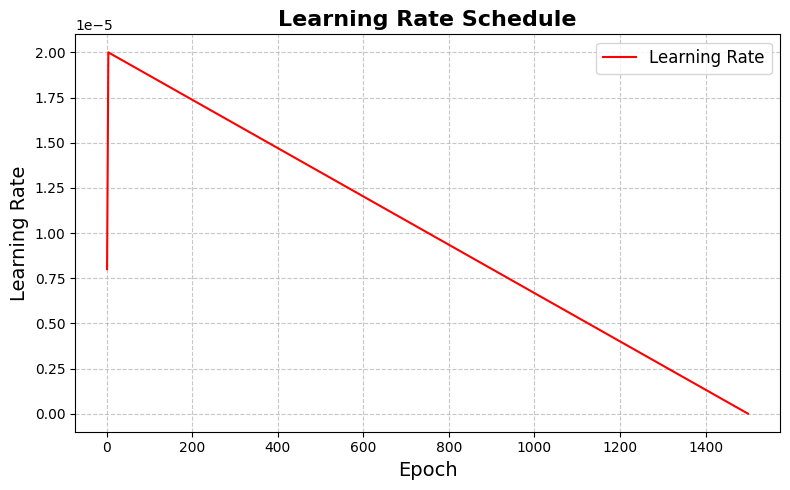

In [31]:
# Plotting the Learning Rate Schedule during training
plt.figure(figsize=(8, 5))

# Plotting the learning rate against epochs
plt.plot(history['_step'], history['train/learning_rate'], label='Learning Rate', color='r')

# Adding labels and title to the plot
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Learning Rate', fontsize=14)
plt.title('Learning Rate Schedule', fontsize=16, fontweight='bold')

# Adding grid and legend for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Display the plot
plt.tight_layout()

plt.savefig("lr_schedule.png")
plt.show()


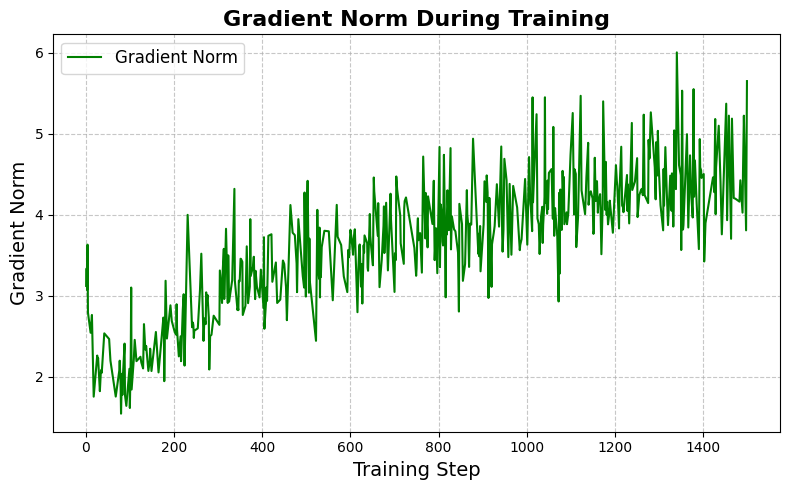

In [32]:
# Plotting the Gradient Norm during training
plt.figure(figsize=(8, 5))

# Plotting the gradient norm against training steps
plt.plot(history['_step'], history['train/grad_norm'], label='Gradient Norm', color='g')

# Adding labels and title to the plot
plt.xlabel('Training Step', fontsize=14)
plt.ylabel('Gradient Norm', fontsize=14)
plt.title('Gradient Norm During Training', fontsize=16, fontweight='bold')

# Adding grid and legend for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Display the plot
plt.tight_layout()
plt.savefig("gardnorm.png")
plt.show()

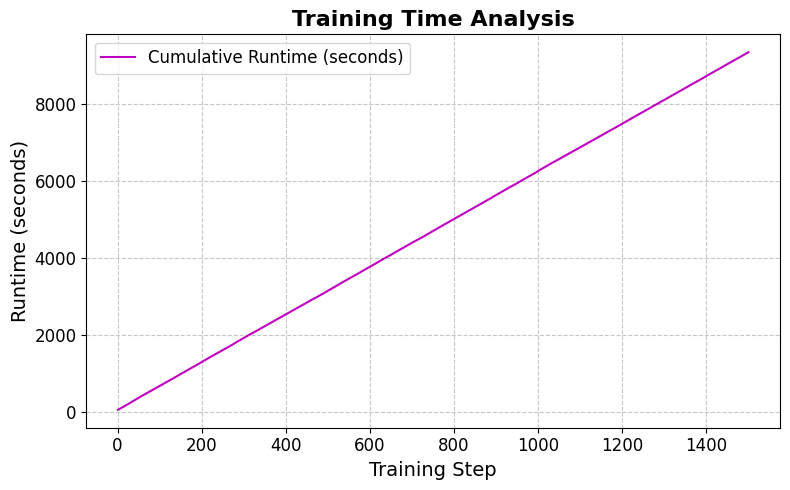

In [28]:
plt.figure(figsize=(8, 5))
plt.plot(history['_step'], history['_runtime'], label='Cumulative Runtime (seconds)', color='m')
plt.xlabel('Training Step', fontsize=14)
plt.ylabel('Runtime (seconds)', fontsize=14)
plt.title('Training Time Analysis', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('training_time_analysis.png', dpi=300)
plt.show()
